This is a Jupyter notebook written by **Student # 209122352** for assessment of the PiIPS module at York St. John Univeristy as part of the Data Science Degree Apprenticeship.

# Evolutionary Optimisation
This report will begin with a basic scenario which utilises a function to calculate the distance between two strings. As an investigative report, different criteria will be looked at to ascertain the distance between two strings.
- Sequence of functions:
 1. Function to assess distance between two strings.
 2. A function to generate random sequences of equal length to the master sequence with a parameter to assign the number of generations
 3. A function to take in a list of generations of random sequences and ascertain which has the least distance from the master sequence
 4. A distance function will take a parent sequence, introduce random mutations in the characters of the sequence and, if the distance of the mutated sequence results in a lesser distance to the master sequence, it will be selected as the new parent generation.
     - This process will be carried out until the master sequence is achieved through evolution
- The first distance function will calculate the **Levenshtein Distance Ratio**.
 - Levenshtein distance calculates the number of edits (deletions, insertaions and substitutions) between two strings
 - It can be used on strings of different lengths and assigns both a 'distance' in the number of edits, as well as a similarity ratio (This report will use the similarity ratio as a decimal number between 0 and 1, with 1 being 100% similar).
- A simpler method to calculate distance using the **Hamming Distance** will be created and analysed for efficiency will different parameters
 - Hamming Distance is more basic than Levenshtein and requires less computational power, but requires the input strings to have equal length.
 - Hamming Distance will produce a number for the distance which is a count of each character from string1 which does not match the corresponding character in string2.


### Initialise Master Sequence
Two strings of varying length are chosen due to high computation cost of of running through many generations with Levenshtein Distance

In [1]:
import string
import random
import numpy as np

In [2]:
#original (parent) string
frankenstein="You will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings."
einstein = "Once you stop learning, you start dying." # shorter string option due to length of computation for Levenshtein

# Check characters to see if they are in punctuation list and only keep those that are not
nopunc = [char for char in frankenstein.lower() if char not in string.punctuation]
nopunct = [char for char in einstein.lower() if char not in string.punctuation]
# Join the characters again to form the string.
frank = ''.join(nopunc) # will be used as master sequence
ein = "".join(nopunct)   
print(len(frank), len(ein))

142 38


# Using Levenshtein Distance Ratio as distance metric
The following functions set up Levenshtein Distance calculations, generation of random sequences and selection of generation with lowest distance to master

In [3]:
def lev_ratio (string_1,string_2):
    # Inpiration for this function taken from [1] and [2]
    """Function to take two strings and calculate variance between them based upon Leveshtein distance.
    First, a matrix of zeros created and indeces populated with characters from each string, the cost for editing any 
    difference is calculated followed by a distance ratio from current generation to parent string. Returns a similarity ratio
    between two strings."""
    
    # set up matrix of zeros
    row = len(string_1)+1
    col = len(string_2)+1
    mat = np.zeros((row,col),dtype = int)
        
    # Populate matrix of zeros with the indeces of each character of both strings
    for i in range(1, row):
        for k in range(1,col):
            mat[i][0] = i
            mat[0][k] = k
           
    for c in range(1, col):
        for r in range(1, row):
            if string_1[r-1] == string_2[c-1]:
                cost = 0 # If the characters are the same in the two strings in a given position [i,j] then the cost is 0
            else:
                # the cost of a substitution is 2. (just to calculate distance - then the cost of a substitution is 1).
                cost = 2
                
            mat[r][c] = min(mat[r-1][c] + 1,               # Cost of deletions
                                 mat[r][c-1] + 1,          # Cost of insertions
                                 mat[r-1][c-1] + cost)     # Cost of substitutions
          
    # Computation of the Levenshtein Distance Ratio
    dist_ratio = ((len(string_1)+len(string_2)) - mat[r][c]) / (len(string_1)+len(string_2))
    return dist_ratio
    
#####################################################################################################################
def random_gen(master, gen_count):
    """Function takes in two parameters; a string and a value for how many mutated generations to produce.  Each new 
    generation is a new string of equal length to parent, but composed of entirely random letters."""
    
    generation_list = []
    abc = list(string.ascii_lowercase) # creates list of lower case alphabet characters
    abc.append( " " ) # add space into list as character to incorporated into random choice
    
    for i in range( gen_count ): 
        offspring = []
        for i in range (len(master)):
            offspring.append(random.choice(abc))
        offspring_str = ''.join(offspring)
        generation_list.append(offspring_str)
    
    return generation_list

###################################################################################################################
def choose_best_gen (master):
    """Iterates through list of random sequences of equal length to parent sequence and chooses sequence with 
    lowest Levenshtein distance ratio to parent."""
    
    gen_list = random_gen(master, 20) # creates n random generations with length (minus punctuation) of the master sequence
    
    closest_string = []
    highest_ratio = 0
    ratio = 0
    
    for item in gen_list:
        ratio = lev_ratio(master,item) # calls function to calculate levenshtein distance ratio
        if ratio > highest_ratio:
            highest_ratio = ratio
            closest_string = item
        
    print("\nOffspring from index position {} has the highest similarity ratio.".format(gen_list.index(closest_string)),"\nLev Ratio: ",highest_ratio, "\n", closest_string) 
    return closest_string, highest_ratio

# this command will call all three functions in turn, creating a list of 20 completely random sequences and 
# choosing the sequnce with the closest distance to original sequence as 'fittest'.

fittest_of_random = choose_best_gen(ein) #using Einstein for Levenshtein due to high compuational cost


Offspring from index position 12 has the highest similarity ratio. 
Lev Ratio:  0.34210526315789475 
 utonofvngqnvfkkw juqjcz stdekxnkvbshcv


### Introduce Evolutinary Optimisation Algorithm
The following function will intoduce random mutation with a probability that is passed in as a parameter.  If the mutated sequence has a lower distance to the master sequence it will be selected as the new parent generation. <p>
    Certain metrics are captured in the algorithm to aid in the visualisation of the results so that an analyis can be conducted over with parameters are the most efficienct.

ozzuiaao fe cxbsfirirxqcjgoucdwrzt uze
0.3684210526315789 56 ozzuiaao fe cxbsfirirxqcjgoucd rzt uze
0.39473684210526316 97 oznuiaao fe cxbsfirirxqcjgoucd rzt uze
0.42105263157894735 159 oznui ao fe cxbsfirirxqcjgoucd rzt uze
0.4473684210526316 190 oznui ao fe cxbafirirxqcjgoucd rzt uze
0.47368421052631576 548 oznui ao fe cxbafirirxqcjgoucd rzt gze
0.5 2126 oznui ao fe cxbafirirnqcjgoucd rzt gze
0.5263157894736842 3933 oznui ao le cxbafirirnqcjgoucd rzt gze
0.5526315789473685 4565 oznui so le cxbafirirnqcjgoucd rzt gze
0.5789473684210527 77314 oznui so le cxbafirirnq jyoucd rzt gze
0.6052631578947368 80833 oznui so le cxbafirirng jyoucd rzt gze
Algorithm ran through 80833 generations.

This is the parent sequence: 
ozzuiaao fe cxbsfirirxqcjgoucdwrzt uze 

This is the better fit sequence: 
oznui so le cxbafirirng jyoucd rzt gze 

The best fit ratio has 0.6052631578947368 similarity with the master sequence
[56, 97, 159, 190, 548, 2126, 3933, 4565, 77314, 80833, 80833] [0.3684210526315789

('oznui so le cxbafirirng jyoucd rzt gze', 0.6052631578947368)

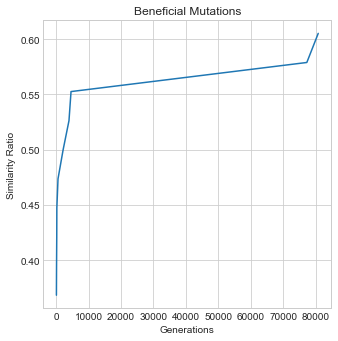

In [21]:
%%time  
# to caputure running time of script
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')

def nat_selection(parent,master,probability, threshold, start_ratio):
    """This function takes in a parent string and will make n copies, introducing a probability with each character
    that a random mutation will occur.  The probability is set as a parameter (1/(probability).  It will then determine
    the distance the offspring sequence is away from the master sequence.  If sequence has a shorter distance than the
    parent, it will be chosen as the parent for the next generation.  The function will loop over this process until the 
    threshold parameter (between 0 and 1) has been reached."""
    print(parent)
    best_fit = parent
    
    abc = list(string.ascii_lowercase)
    abc.append(" ") # add in space to list of characters
    gen_count = 0
    gen_with_mutation = [] # list to hold x values
    ratio_y = [] # list to hold y values
    best_ratio = start_ratio # set best_ratio to ratio of parent sequence
    
    while best_ratio < threshold: 
        offspring = []

        for i in best_fit:
            #introduce probability ( i.e. 1/10 or 1/25) that a random error will be introduced
            p=random.choice(range(0,probability)) 
            if p == 1:
                offspring.append(random.choice(abc))
            else:
                offspring.append(i)

        offspring_str = ''.join(offspring)
        gen_count += 1
        
        ratio = lev_ratio(master,offspring_str)  # calls function to calculate levenshtein distance ratio
        if ratio > best_ratio:
            best_ratio = ratio
            print (best_ratio, gen_count, offspring_str)
            best_fit = offspring_str
            gen_with_mutation.append(gen_count)
            ratio_y.append(ratio)

    gen_with_mutation.append(gen_count) # append final values to x and y counters so plot reflects final gen count
    ratio_y.append(best_ratio)
    print ("Algorithm ran through {} generations.".format(gen_count))
    print ("\nThis is the parent sequence: \n{}".format(parent), "\n\nThis is the better fit sequence: \n{}".format(best_fit),
          "\n\nThe best fit ratio has {} similarity with the master sequence".format(best_ratio))
    
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_axes([0,0,1,1])
    ax.set_xlabel('Generations')
    ax.set_ylabel('Similarity Ratio')
    ax.set_title('Beneficial Mutations')
    ax.plot(gen_with_mutation, ratio_y)
    #plt.plot(gen_with_mutation, ratio_y) # plot generations with successful mutations against distance ratio
    
    print(gen_with_mutation, ratio_y)
    return best_fit, best_ratio, 

nat_selection(fittest_of_random[0],ein,150, 0.60,fittest_of_random[1]) #script only executed to 60% similarity in this instance


# Analysis of Results
This section will look at some of the results of using the Levenshtein Distance to reach the master sequence through evolution. <p>
    Note: Due to computational costs of using a long string (Frankenstein has 143 characters, Einstein has 38) initially the Frankenstein string was used, but as beneficial mutations plateaued, the Einstein quote was used in effort to speed up the computations. 

### Analysis of running longer (Frankenstein) string.  
*Note: number of generations was severely restrained due to time needed to carry out computations.  On average, it took an hour to iterate through 43,000 generations.*<p>
- **Master**: you will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings
1. Best similarity ratio: 62.7% similar to master sequence
2. Most similar mutated sequence after 120,000 generations and 169 minutes runtime: 
    
 - you wijjllrietotohtnyos atehcvaws atcgncnyopiedthoqmqmeprrnkcem  terriihu avperegtardhrled th uecwnmh vpkojriwexurvizlmgr fwnoebodndinu dgqcws

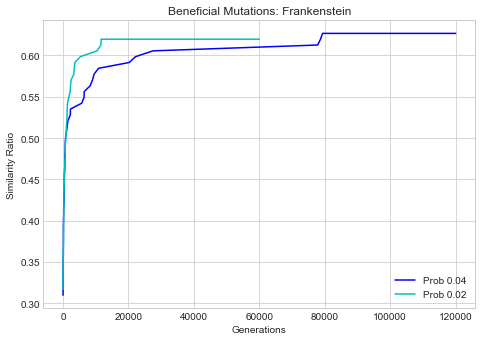

In [17]:
x_values = [3, 6, 13, 43, 69, 79, 82, 90, 155, 168, 177, 180, 229, 250, 280, 305, 307, 325, 376, 397, 411, 519, 562, 685, 700, 735, 877, 989, 1039, 1204, 1237, 1383, 1776, 2198, 2324, 2489, 3334, 3451, 3640, 5324, 10427, 11588, 11666, 40000,60000]
y_values = [0.31690140845070425, 0.323943661971831, 0.33098591549295775, 0.3380281690140845, 0.34507042253521125, 0.352112676056338, 0.3591549295774648, 0.36619718309859156, 0.3732394366197183, 0.38028169014084506, 0.3873239436619718, 0.39436619718309857, 0.4014084507042254, 0.4084507042253521, 0.4154929577464789, 0.4225352112676056, 0.4295774647887324, 0.43661971830985913, 0.44366197183098594, 0.4507042253521127, 0.45774647887323944, 0.4647887323943662, 0.47183098591549294, 0.4788732394366197, 0.4859154929577465, 0.49295774647887325, 0.5, 0.5070422535211268, 0.5140845070422535, 0.5211267605633803, 0.528169014084507, 0.5422535211267606, 0.5492957746478874, 0.5563380281690141, 0.5633802816901409, 0.5704225352112676, 0.5774647887323944, 0.5845070422535211, 0.5915492957746479, 0.5985915492957746, 0.6056338028169014, 0.6126760563380281, 0.6197183098591549,0.6197183098591549,0.6197183098591549]

x_val = [26, 35, 40, 44, 47, 59, 128, 131, 140, 141, 154, 166, 210, 231, 336, 358, 413, 425, 482, 558, 582, 686, 701, 785, 1035, 1301, 1518, 2257, 2296, 5733, 6451, 6493, 8315, 9035, 9522, 10877, 20259, 22175, 27524,77829, 78691, 79327,120000]
y_val = [0.30985915492957744, 0.31690140845070425, 0.323943661971831, 0.33098591549295775, 0.34507042253521125, 0.352112676056338, 0.3591549295774648, 0.3732394366197183, 0.38028169014084506, 0.3873239436619718, 0.39436619718309857, 0.4014084507042254, 0.4084507042253521, 0.4154929577464789, 0.4225352112676056, 0.4295774647887324, 0.43661971830985913, 0.4507042253521127, 0.45774647887323944, 0.4647887323943662, 0.4788732394366197, 0.4859154929577465, 0.49295774647887325, 0.5, 0.5070422535211268, 0.5140845070422535, 0.5211267605633803, 0.528169014084507, 0.5352112676056338, 0.5422535211267606, 0.5492957746478874, 0.5563380281690141, 0.5633802816901409, 0.5704225352112676, 0.5774647887323944, 0.5845070422535211, 0.5915492957746479, 0.5985915492957746, 0.6056338028169014,0.6126760563380281, 0.6197183098591549, 0.6267605633802817,0.6267605633802817]


fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Generations')
ax.set_ylabel('Similarity Ratio')
ax.set_title('Beneficial Mutations: Frankenstein')
ax.plot(x_val, y_val, label = "Prob 0.04", color = 'b')
#ax.plot(x, y, label = "Prob 0.04", color ='g')
ax.plot(x_values, y_values, label = "Prob 0.02", color ='c')
plt.legend()
plt.show()

### Analysis of running shorter (Einstein) string
Due to length in computations (better than longer string, but still took one hour to iterate through 65,000 generations), even for shorter string, at no point was the master sequence reached through Evolution.  The closest similarity ratio achieved was 81.6% using a mutation probability of 1/10 (0.1).  

1. With simiraity ratio of 81.6%, and after 1.2 million generations (111 minutes runtime), the closest the mutated sequence was the following:
 - **Master Sequence**: 'once you stop learning you start dying' 
 - **Mutated Offspring**: 'ncgeq youstuop arnigyoku startgp vdyig'

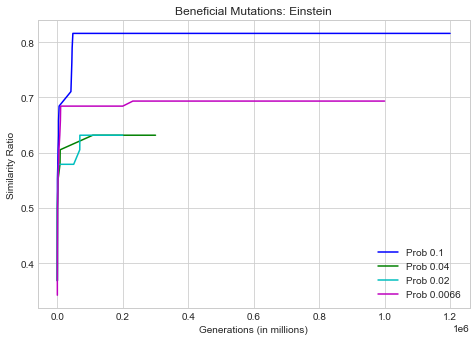

In [23]:
# coordinates for 1/10 (0.1) mutation probability
x1 = [3, 5, 44, 95, 115, 118, 256, 297, 1536, 2270, 3661, 3755, 5391, 41520, 44334, 45270, 47496, 200001,300001,400001,500001,700000,1000001,1200001]
y1 = [0.3684210526315789, 0.39473684210526316, 0.42105263157894735, 0.4473684210526316, 0.47368421052631576, 0.5, 0.5263157894736842, 0.5526315789473685, 0.5789473684210527, 0.6052631578947368, 0.631578947368421, 0.6578947368421053, 0.6842105263157895, 0.7105263157894737, 0.7631578947368421, 0.7894736842105263, 0.8157894736842105,0.8157894736842105,0.8157894736842105,0.8157894736842105,0.8157894736842105,0.8157894736842105,0.8157894736842105,0.8157894736842105]

#coordinates for 1/25 (0.04) mutation probability
x = [19, 132, 145, 196, 203, 457, 1067, 2486, 8085, 8729, 108277, 200001, 300000]
y = [0.3684210526315789, 0.39473684210526316, 0.42105263157894735, 0.4473684210526316, 0.47368421052631576, 0.5, 0.5263157894736842, 0.5526315789473685, 0.5789473684210527, 0.6052631578947368, 0.631578947368421, 0.631578947368421,0.631578947368421]

#coordinates for 1/50 (0.02) mutation probability
x_value = [29, 162, 164, 221, 293, 366, 1341, 2642, 3801, 50000,68548, 68862,100000,200000,3500000]
y_value = [0.3684210526315789, 0.39473684210526316, 0.42105263157894735, 0.4473684210526316, 0.47368421052631576, 0.5, 0.5263157894736842, 0.5526315789473685, 0.5789473684210527,0.5789473684210527,0.6052631578947368, 0.631578947368421,0.631578947368421,0.631578947368421,0.631578947368421]

#coordinates for 1/150 (0.0066) mutation probability
x_150 = [34, 48, 236, 310, 533, 799, 827, 1742, 2287, 3684, 4939, 7483, 9341, 10158, 200000,230731,500000,1000000]
y_150 = [0.34210526315789475, 0.3684210526315789, 0.39473684210526316, 0.42105263157894735, 0.4473684210526316, 0.47368421052631576, 0.5, 0.5263157894736842, 0.5526315789473685, 0.5789473684210527, 0.6052631578947368, 0.631578947368421, 0.6578947368421053, 0.6842105263157895,0.6842105263157895,0.6933333333333334,0.6933333333333334,0.6933333333333334]

fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Generations (in millions)')
ax.set_ylabel('Similarity Ratio')
ax.set_title('Beneficial Mutations: Einstein')
ax.plot(x1, y1, label = "Prob 0.1", color = 'b')
ax.plot(x, y, label = "Prob 0.04", color ='g')
ax.plot(x_value, y_value, label = "Prob 0.02", color ='c')
ax.plot(x_150, y_150, label = "Prob 0.0066", color ='m')
plt.legend()
plt.show()

### Conclusion:
It is possible, given enough time and computational power, the algorithm would eventually arrive at the master sequence through mutation.  However, as the above plots suggest, the beneficial mutation rate is quite rapid for the first 50,000 generations and then slows dramtically, if not stopping altogether.  Interestingly, while changing the probability for mutation has a small effect in the pace of early mutations (generations < 50,000), it does not seem to have an effect on the pace of benefical mutations after 100,000 generations have passed.<p>
    It would appear that the way the matrix is created in the Levenshtein Distance function does not analyse with sufficient granularity whether indivudual character mutations are sufficiently beneficial to keep.  The Levenshtein Distance Ratio is potentially better at ascertaing the overall similarity between two strings, especially if they are of different lengths.

# Evolutionary Optimisation using Hamming Distance
The following investigation will look at using the same processes as above, but substituting the Levenshtein Distance function for one that calculates the Hamming Distance.<p>
    The below analysis is using a simple function that calculates the Hamming Distance between two strings of equal length. It compares each string, component by component, and if the respective components are not equal a distance counter is increased by one. There is no calculation for how far apart each component is, only that they are not equal.

In [3]:
# re-use random_gen function from above, but slightly change choose_best_ham function to call ham_distance

def ham_distance(master, offspring):
    """Function compares two input strings componenent by component.  If the respective components are equal no distance
    is assigned, otherwise a value (distance) of 1 is added to the counter.  The function returns the overall distance
    between the two strings."""
    
    distance = 0
    for char in range(len(master)):
        if master[char] != offspring[char]: # if characters in same position don't match, add 1 to distance counter
            distance += 1
    return distance

###################################################################################################################
def random_gen(master, gen_count):
    """Function takes in two parameters; a string and a value for how many mutated generations to produce.  Each new 
    generation is a new string of equal length to parent, but composed of entirely random letters."""
    
    generation_list = []
    abc = list(string.ascii_lowercase) # creates list of lower case alphabet characters
    abc.append( " " ) # add space into list as character to incorporated into random choice
    
    for i in range( gen_count ): 
        offspring = []
        for i in range (len(master)):
            offspring.append(random.choice(abc))
        offspring_str = ''.join(offspring)
        generation_list.append(offspring_str)
    
    return generation_list

###################################################################################################################
def choose_best_ham (master):
    """Iterates through list of random sequences of equal length to parent sequence and chooses sequence with 
    lowest Hamming distance to parent."""
    
    # creates n random generations with length of the master sequence, 2nd parameter is number of generations
    gen_list = random_gen(master, 20) 
    
    closest_string = []
    shortest_distance = len(master)
    
    for item in gen_list:
        dist = ham_distance(master,item) # calls function to calculate levenshtein distance ratio
        if dist < shortest_distance:
            shortest_distance = dist
            closest_string = item
        
    print("\nOffspring from index position {} has the shortest Hamming Distance to master sequence.".format(gen_list.index(closest_string)),"\nHamming Distance: ",shortest_distance, "\n", closest_string) 
    return closest_string, shortest_distance

# this command will call all three functions in turn, creating a list of 20 completely random sequences and 
# choosing the sequnce with the closest distance to original sequence as 'fittest'.

fittest = choose_best_ham(frank) #quickly determined that can use longer Frankenstein string instead of Einstein 


Offspring from index position 8 has the shortest Hamming Distance to master sequence. 
Hamming Distance:  131 
 ibsguaaquzbraiiorfd  rwpsbedbfmq ckvvmrkhkpgonq avsygxnvnkgkmncawpejjxiujk gxebzdyzoufor jzivbnadcrwexigddpbbejanmmxiuje nyhpywggmmmakbdwden s


Master sequence is:  you will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings 

Starting random sequence is:  ibsguaaquzbraiiorfd  rwpsbedbfmq ckvvmrkhkpgonq avsygxnvnkgkmncawpejjxiujk gxebzdyzoufor jzivbnadcrwexigddpbbejanmmxiuje nyhpywggmmmakbdwden s 

130 25 
 ibsguaaquzbraiiorfd  rwpsbedbfmq ckvvmrkhkpgonq ovhvgxnvskgkmncawpejjxiujk gxebzdyzoufor jzivbnadcrwexigddpbbejadmnxiuje nyhpywggmmmakbdwden s
120 381 
 ibsguaaquzbroiiorfd  rwpsbedbomq ckvvmrshkpgonq ovhvgxnvs gkm cawpejjxiujk gx bzdezouwprkaziwbigdcpwexigddpmeejadsnxiuje jyhpywggmmfakbdwden s
110 763 
 imuguaaquzbroiiorfd  rdwsbedbo o ckvvmrshkpgona cohvgxnvs gnm cawmejjxiujk gx bzdezourprkiziwbicdcpwexigddpreejadenxiuje jyhpywggmmfakbdwdencs
100 1210 
 imuguaaluzeroiinrfd  rdwsbedbovo cwvvmqehkpaona cohlgxnod gnm cawmejjxgunt gx bzdezourprkiziwbicdcpwexigddpreejkdedxwbge jyhpywgwmmfakbdwdengs
90 1892 
 imuguafluzepoiierfd  rdwsbedbovo cwvv

('you will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings',
 0)

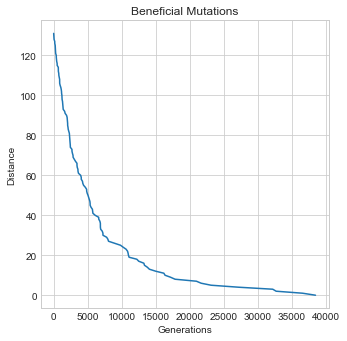

In [7]:
%%time
import string
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')

def natural_selection(parent,master,probability,dist):
    """This function takes in a parent string and will make n copies, introducing a probability with each character
    that a random mutation will occur.  The probability is set as a parameter (1/(probability).  It will then determine
    the distance the offspring sequence is away from the master sequence.  If sequence has a shorter distance than the
    parent, it will be chosen as the parent for the next generation.  The function will loop over this process until the 
    master sequence has been reached through evolution."""
    
    print("Master sequence is: ",master,"\n\nStarting random sequence is: ",parent, "\n")
    best_fit = parent
    
    abc = list(string.ascii_lowercase)
    abc.append(" ") # add in space to list of characters
    gen_count = 0
    gen_with_mutation = [] # list to x values
    distance_y = [] # list to hold y values
    shortest_d = dist # set best_ratio to ratio of parent sequence
    
    while shortest_d > 0: #will run until master sequence achieved
        offspring = []

        for i in best_fit:
            #introduce probability ( i.e. 1/10 or 1/25) that a random error will be introduced
            p = random.choice(range(0,probability)) 
            if p == 1:
                offspring.append(random.choice(abc))
            else:
                offspring.append(i)

        offspring_str = ''.join(offspring)
        gen_count += 1
        
        distance = ham_distance(master,offspring_str)  # calls function to calculate Hamming distance
        if distance < shortest_d:
            shortest_d = distance
            if shortest_d % 10 == 0: #only print results from every 10 distance changes
                print (shortest_d, gen_count, "\n", offspring_str)
            best_fit = offspring_str
            gen_with_mutation.append(gen_count)
            distance_y.append(distance)
        if gen_count == 500000:
            print(gen_with_mutation,distance_y,gen_count, best_fit)

    gen_with_mutation.append(gen_count) # append final values to x and y counters so plot reflects final gen count
    distance_y.append(shortest_d)
    
    print ("\nAlgorithm ran through {} generations.".format(gen_count))
    #print ("\nThis is the parent sequence: \n{}".format(parent), "\n\nThis is the better fit sequence: \n{}".format(best_fit),
    #      "\n\nThe best fit ratio has {} similarity with the master sequence".format(shortest_d))
    
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_axes([0,0,1,1])
    ax.set_xlabel('Generations')
    ax.set_ylabel('Distance')
    ax.set_title('Beneficial Mutations')
    ax.plot(gen_with_mutation, distance_y)
        
    print("\nX and Y coordinates for plot: ",gen_with_mutation, distance_y)
    return best_fit, shortest_d, 

natural_selection(fittest[0],frank,100,150) 

# Analysis of Results
This section will look at some of the results of using the Hamming Distance to reach the master sequence through evolution. <p>
    Note: Einstein was initially run through algorithm and achieved very quick results.  Analysis quickly moved on to the longer string from Frankenstein.

Unlike above results using Levenshtein Distance, Hamming Distance achieved immediate results, aside from attempts with a mutation probability of 1/10, in which the script was terminated before finishing due to slow progress (interestingly, the Levenshtien Distance Ratio achieved it's best results with the Einstein string using a mutation probability of 1/10).
1. **Best result was with a 1/100 (0.01) probability for mutation**.
 - **25,560 generations to achieve 100% simalarity with master sequence. Processing time: 3.35 seconds**
 
2. Overall, there was a similar trend for results with mutation probability between 0.0133 (1/75) and 0.004 (1/250)
 - Very quick reduction in distance in first 20,000 generations
 - Discrepencies showed up in closing down the last 5 distance units with mutation probabilities of 0.01, 0.005 and 0.0066 achieving the fastest completion
<p>

*Becuase of the nature of random mutatation, one will achieve different results at each iteration with the same probability of mutation.  To achieve conclusive results, many thousands of iterations will need to be conducted*

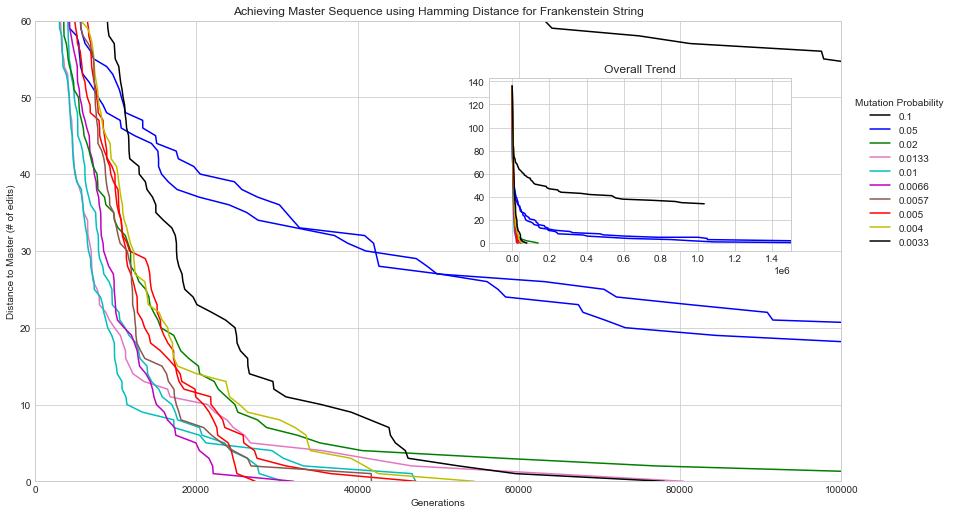

In [8]:
#Plot showing distance ratio by number of generations for Frankenstein using Hamming Distnace

#coordinates for mutations with probability of 1/10 (0.1) - didn't achieve master (stopped after 1050000)
hx_10 = [1, 5, 10, 17, 29, 30, 33, 35, 44, 53, 60, 83, 97, 137, 145, 244, 282, 362, 384, 393, 502, 602, 611, 678, 806, 818, 1103, 1105, 1140, 1343, 1509, 1528, 1553, 1615, 1858, 1896, 2002, 2308, 2513, 2628, 2678, 3918, 4270, 4284, 4661, 6266, 6644, 7335, 7574, 7776, 7995, 8134, 9839, 11056, 14594, 15931, 16342, 17773, 21954, 27322, 28276, 31250, 34035, 36328, 43316, 49713, 54008, 63194, 64113, 74912, 81240, 97532, 97811, 104594, 110947, 114879, 122472, 183125, 186040, 198384, 244649, 249300, 262812, 370154, 418563, 536110,557595,594788,753412,876878,910168,1033136]
hy_10 = [134, 133, 132, 131, 130, 129, 128, 127, 125, 124, 123, 122, 121, 120, 119, 117, 116, 115, 114, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 96, 95, 94, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 49, 48, 47, 46, 45, 44, 43, 42,41,39,38,37,36,35,34]

#coordinates for mutations with probability of 1/20 (0.05)
hx_20 = [1, 3, 9, 10, 11, 16, 20, 30, 56, 68, 73, 104, 113, 119, 132, 145, 150, 163, 173, 176, 195, 208, 215, 222, 227, 258, 272, 274, 282, 310, 362, 370, 389, 455, 466, 470, 486, 492, 580, 767, 802, 810, 816, 959, 966, 1027, 1031, 1032, 1101, 1162, 1470, 1595, 1615, 1664, 1679, 1759, 1786, 2573, 2580, 2690, 3509, 3524, 3569, 3595, 3779, 4173, 4464, 4611, 5596, 5630, 5699, 5930, 6218, 6907, 7298, 8897, 9646, 10052, 10469, 10726, 11009, 11233, 13357, 13374, 14961, 15094, 17514, 17781, 19688, 20490, 24739, 25650, 27617, 30315, 31970, 32819, 40882, 41989, 42664, 50133, 56067, 57418, 58359, 67390, 67966, 70665, 73202, 84396, 103529, 112640, 117281, 141502, 142944, 150100, 191971, 200001,234926, 310449, 325824, 471674, 492287, 500001,607850, 782289, 1000001,1049067, 1050022, 1496006, 2000001,2028462, 2548017, 2548017]
hy_20 = [136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 101, 100, 98, 97, 96, 95, 94, 93, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 75, 74, 73, 72, 71, 70, 69, 68, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 34, 33, 32, 31, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 12,11, 10, 9, 8, 7, 7,6, 5, 5,4, 3, 2, 2,1, 0, 0]

#coordinates for mutations with probability of 1/20 (0.05) - second run
hx_20_2 = [1, 13, 22, 31, 34, 38, 45, 54, 56, 57, 82, 85, 96, 117, 137, 157, 178, 181, 195, 197, 212, 223, 226, 240, 276, 392, 421, 462, 494, 507, 526, 553, 556, 569, 607, 681, 713, 830, 855, 947, 1044, 1061, 1132, 1174, 1232, 1237, 1455, 1565, 1581, 1619, 1713, 1747, 1901, 2004, 2023, 2430, 2642, 2868, 3304, 3395, 3454, 4077, 4108, 4281, 5165, 5446, 5477, 5583, 5655, 5950, 6699, 7310, 7833, 8442, 8885, 10568, 10698, 12368, 14442, 15243, 15328, 15331, 15699, 16529, 17621, 20359, 24062, 26263, 27660, 37143, 38782, 40995, 47281, 48642, 49857, 63164, 70566, 72108, 81241, 90818, 91505, 119749, 127808, 129162, 138859, 139803, 173197, 175107, 192544, 193328, 230468, 240684, 246387, 380770, 404609, 515000, 623854, 857319, 962600, 1085438, 1815708, 1815708]
hy_20_2 = [136, 135, 134, 133, 132, 131, 130, 129, 128, 126, 125, 124, 123, 122, 119, 118, 116, 115, 114, 113, 112, 111, 110, 109, 107, 106, 105, 104, 103, 102, 101, 100, 99, 97, 95, 94, 93, 92, 91, 89, 88, 87, 86, 85, 84, 83, 81, 80, 79, 77, 76, 75, 74, 73, 72, 70, 69, 68, 67, 66, 64, 63, 61, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0]

#coordinates for mutations with probability of 1/75 (0.0133)
hx_75 = [1, 31, 43, 98, 101, 173, 180, 195, 215, 287, 291, 363, 397, 407, 409, 433, 470, 474, 485, 495, 500, 549, 585, 592, 646, 667, 695, 716, 728, 760, 794, 806, 862, 936, 1018, 1019, 1125, 1178, 1246, 1285, 1314, 1474, 1487, 1509, 1556, 1564, 1629, 1681, 1684, 1739, 1747, 1801, 1829, 1843, 1874, 1909, 1973, 2135, 2148, 2159, 2304, 2523, 2535, 2620, 2895, 2932, 3013, 3025, 3123, 3141, 3152, 3159, 3199, 3273, 3292, 3340, 3567, 3645, 4056, 4112, 4116, 4259, 4271, 4369, 4554, 4598, 4620, 4698, 4710, 4816, 4872, 4927, 5259, 5562, 5886, 5934, 6036, 6526, 6538, 6577, 6783, 6967, 7005, 7043, 7111, 7212, 7715, 7969, 7997, 8776, 9226, 9866, 10591, 10898, 11231, 11250, 11717, 12156, 13516, 16444, 16757, 21404, 22301, 23805, 24597, 25986, 26726, 35574, 41082, 46735, 63719, 80451, 80451]
hy_75 = [131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0]

#coordinates for mutations with probability of 1/100 (0.01)
hx_100 = [1, 25, 31, 49, 72, 96, 111, 148, 157, 180, 187, 272, 334, 385, 395, 408, 418, 423, 427, 477, 601, 609, 617, 640, 682, 727, 736, 768, 769, 799, 828, 915, 933, 954, 1011, 1037, 1090, 1111, 1116, 1165, 1195, 1332, 1399, 1434, 1437, 1507, 1531, 1585, 1669, 1746, 1762, 1825, 1838, 1857, 1913, 1952, 1983, 2017, 2026, 2114, 2201, 2285, 2288, 2350, 2455, 2463, 2504, 2507, 2692, 2697, 2732, 2782, 2845, 2938, 2992, 3042, 3055, 3321, 3376, 3387, 3451, 3471, 3879, 4070, 4187, 4319, 4357, 4405, 4483, 4636, 4638, 4684, 4735, 4840, 5028, 5167, 5762, 5807, 5940, 6017, 6155, 6271, 6464, 6511, 6641, 6893, 6924, 7105, 7327, 7355, 8126, 8394, 8531, 8795, 9015, 9523, 9843, 9859, 9877, 10092, 10209, 10789, 10809, 11283, 11406, 13335, 17212, 17231, 20421, 21214, 29372, 30803, 33305, 46754, 47204, 47204]
hy_100 = [136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0]

hx_102 = [1, 3, 32, 56, 79, 119, 142, 176, 226, 242, 254, 281, 298, 346, 370, 393, 412, 430, 470, 486, 554, 560, 600, 630, 657, 681, 800, 852, 873, 881, 956, 960, 1002, 1027, 1061, 1099, 1247, 1264, 1270, 1480, 1583, 1600, 1717, 1848, 1896, 1901, 1973, 2027, 2154, 2211, 2213, 2329, 2385, 2418, 2525, 2683, 2719, 2794, 2797, 2841, 2906, 2907, 2995, 3108, 3261, 3388, 3444, 3534, 3572, 3860, 3861, 3935, 4085, 4096, 4126, 4163, 4221, 4235, 4432, 4448, 4664, 4835, 4874, 5012, 5257, 5298, 5307, 5320, 5679, 5905, 6005, 6190, 6198, 6254, 6428, 6679, 6902, 7529, 7565, 7629, 7859, 7883, 8018, 8402, 8541, 9180, 9542, 9565, 9594, 10421, 10520, 11169, 11664, 12547, 12840, 13019, 13900, 13972, 14455, 15354, 15783, 16965, 17400, 17695, 20416, 20721, 23512, 24236, 26319, 27570, 27809, 30819, 30819]
hy_102 = [132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0]

#coordinates for mutations with probability of 1/50 (0.02)
hx_50 = [1, 8, 16, 18, 28, 37, 53, 70, 74, 92, 108, 111, 121, 125, 136, 138, 139, 222, 279, 283, 308, 327, 347, 356, 414, 415, 440, 563, 567, 577, 579, 597, 603, 604, 616, 632, 639, 742, 755, 769, 912, 964, 998, 1013, 1059, 1061, 1119, 1125, 1322, 1398, 1432, 1445, 1485, 1555, 1870, 1897, 1933, 2013, 2046, 2144, 2244, 2302, 2508, 2535, 2991, 3022, 3119, 3154, 3193, 3271, 3291, 3298, 3379, 3576, 3584, 3609, 3889, 4031, 4113, 4291, 4585, 4789, 4843, 5404, 5471, 5530, 5772, 5994, 6090, 6445, 6728, 6952, 7197, 7699, 7777, 7806, 8625, 8802, 9757, 9853, 10302, 11203, 11538, 11859, 11867, 11868, 12536, 12891, 13730, 14130, 14256, 14722, 15249, 15609, 17218, 17650, 18077, 19063, 20277, 20426, 22227, 22734, 23743, 24801, 25156, 27589, 28728, 32545, 35350, 40562, 58031, 77007, 110153, 139485, 139485]
hy_50 = [136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0]

#coordinates for mutations with probability of 1/150 (0.0066)
hx_150 = [1, 55, 70, 102, 133, 156, 159, 168, 201, 292, 295, 361, 400, 403, 442, 558, 596, 637, 657, 676, 690, 695, 760, 775, 826, 848, 957, 1169, 1179, 1225, 1228, 1325, 1331, 1380, 1381, 1481, 1507, 1509, 1523, 1524, 1579, 1711, 1770, 1791, 1835, 1875, 1894, 1944, 1962, 2045, 2213, 2223, 2276, 2527, 2658, 2686, 2710, 2785, 2836, 3011, 3086, 3221, 3246, 3282, 3408, 3530, 3569, 3942, 4000, 4078, 4160, 4179, 4193, 4288, 4314, 4492, 4652, 4844, 5056, 5250, 5252, 5289, 5498, 5562, 5790, 5921, 6202, 6433, 6728, 6776, 6809, 7089, 7260, 7357, 7589, 7642, 7899, 7973, 8153, 8173, 8178, 8229, 8444, 8519, 8830, 9153, 9719, 9820, 9821, 9909, 9976, 10029, 10229, 11058, 11986, 12344, 12680, 12816, 12968, 13764, 14299, 14580, 14758, 15067, 16037, 16431, 17324, 17462, 19958, 20393, 21569, 22036, 22106, 32084, 32084]
hy_150 = [135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 97, 96, 95, 94, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0]

#coordinates for mutations with probability of 1/200 (0.005)
hx_200 = [1, 53, 81, 97, 121, 132, 153, 192, 225, 436, 503, 511, 585, 597, 649, 799, 831, 885, 967, 991, 1013, 1180, 1201, 1245, 1369, 1393, 1455, 1487, 1534, 1654, 1663, 1684, 1810, 1882, 1960, 1975, 2111, 2225, 2580, 2634, 2642, 2695, 2728, 2815, 2841, 2926, 2993, 3115, 3127, 3265, 3592, 3599, 3618, 3685, 3702, 3712, 3944, 3971, 3979, 4006, 4241, 4350, 4373, 4440, 4720, 4824, 5273, 5464, 5687, 5735, 5792, 5874, 5885, 6023, 6088, 6200, 6482, 6636, 6675, 6933, 6939, 6985, 7035, 7176, 7341, 7582, 7649, 7790, 7843, 8444, 8481, 8623, 8764, 8900, 8903, 9286, 9411, 9742, 10291, 10359, 10380, 10466, 10679, 10798, 10838, 11100, 11333, 11338, 11486, 11886, 12180, 12413, 12667, 12694, 12715, 13290, 13597, 14148, 14343, 15551, 16475, 17322, 18000, 18214, 19859, 19934, 20923, 21607, 22109, 22553, 22662, 23966, 24350, 24571, 24826, 25048, 27328, 27328]
hy_200 = [136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0]

#coordinates for mutations with probability of 1/200 (0.005) - second run
hx_201 = [1, 82, 150, 173, 195, 229, 252, 279, 305, 315, 344, 345, 527, 560, 563, 578, 604, 651, 653, 672, 691, 696, 731, 803, 819, 847, 879, 928, 939, 967, 985, 1025, 1062, 1165, 1295, 1326, 1352, 1394, 1484, 1529, 1567, 1614, 1629, 1717, 1797, 1942, 1974, 2055, 2061, 2146, 2317, 2322, 2350, 2389, 2396, 2504, 2683, 2711, 2776, 2973, 3055, 3069, 3296, 3430, 3492, 3768, 3932, 4011, 4070, 4087, 4415, 4506, 4551, 4765, 4795, 4926, 5056, 5217, 5272, 5611, 5720, 5833, 5881, 6198, 6313, 6490, 6834, 6863, 7939, 8015, 8035, 8283, 8604, 8994, 9551, 9918, 9929, 9963, 10062, 10176, 10384, 10708, 10762, 10906, 11430, 11720, 13677, 14049, 14234, 14300, 14428, 14752, 15144, 15163, 15543, 15610, 15997, 16484, 17188, 17190, 17418, 17592, 17871, 18481, 21790, 21834, 22582, 23285, 23547, 25821, 25900, 27221, 27541, 31144, 36692, 47231, 47231]
hy_201 = [136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0]

#coordinates for mutations with probability of 1/300 (0.0033)
hx_300 = [1, 40, 92, 303, 339, 365, 428, 554, 589, 603, 920, 1007, 1262, 1420, 1477, 1482, 1569, 1731, 1767, 1791, 1854, 1926, 1971, 2090, 2280, 2449, 2455, 2462, 2523, 2718, 2727, 2841, 2867, 2892, 2909, 2923, 3042, 3261, 3269, 3312, 3374, 3518, 3582, 3677, 3725, 3763, 3948, 4072, 4332, 4510, 4826, 4857, 4935, 4973, 5066, 5089, 5268, 5483, 5489, 5871, 5901, 6056, 6516, 6525, 6630, 6852, 7048, 7255, 7490, 7681, 7765, 8136, 8315, 8830, 8841, 8984, 9042, 9182, 9832, 9901, 9957, 10399, 10503, 10621, 10803, 10926, 11115, 11160, 11292, 11366, 11609, 11646, 11667, 11755, 12896, 12934, 13693, 13893, 14583, 14986, 14993, 15923, 16975, 17408, 17546, 17553, 17621, 17845, 18234, 18351, 18578, 19610, 20090, 21914, 23635, 24810, 24996, 25067, 25478, 26376, 26411, 26597, 29511, 29631, 31117, 35481, 39219, 41578, 43905, 44083, 44701, 45930, 46272, 52556, 59587, 78033, 78033]
hy_300 = [136, 135, 134, 133, 132, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0]

#coordinates for mutations with probability of 1/250 (0.004)
hx_250 = [1, 30, 59, 155, 242, 311, 333, 355, 424, 464, 493, 611, 723, 1007, 1040, 1092, 1112, 1114, 1260, 1286, 1372, 1438, 1445, 1485, 1554, 1586, 1596, 1681, 1689, 1700, 1798, 1917, 2048, 2113, 2125, 2239, 2284, 2288, 2318, 2377, 2393, 2414, 2424, 2432, 2503, 2740, 2858, 2866, 3009, 3190, 3196, 3239, 3420, 3436, 3514, 3554, 3716, 3758, 3865, 4003, 4048, 4114, 4186, 4324, 4448, 4607, 4776, 4872, 4996, 5078, 5147, 5187, 5191, 5231, 5238, 5660, 6514, 6864, 7082, 7213, 7308, 7367, 7443, 7597, 7768, 7842, 7914, 8178, 8313, 8442, 8805, 9315, 9381, 9448, 10120, 10283, 10384, 10531, 10653, 10851, 10894, 11070, 11385, 11592, 11836, 12218, 12257, 12355, 12382, 13620, 13793, 13934, 14045, 15388, 15775, 16467, 16607, 17060, 17076, 17260, 17689, 20069, 23677, 23897, 24142, 25362, 26365, 30342, 32262, 33626, 33830, 34146, 39160, 40892, 42588, 54503, 54503]
hy_250 = [136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0]

#coordinates for mutations with probability of 1/175 (0.0057)
hx_175 = [1, 7, 116, 138, 143, 185, 264, 369, 382, 498, 562, 662, 688, 704, 711, 728, 749, 776, 811, 869, 979, 1036, 1084, 1159, 1182, 1259, 1267, 1351, 1387, 1405, 1410, 1413, 1426, 1469, 1500, 1516, 1601, 1611, 1642, 1645, 1654, 1671, 1755, 1792, 1891, 1927, 2028, 2126, 2402, 2458, 2555, 2609, 2661, 2761, 2886, 3039, 3107, 3310, 3415, 3549, 3551, 3586, 3629, 4040, 4097, 4201, 4233, 4371, 4403, 4780, 4836, 5315, 5522, 5654, 5667, 5670, 5699, 5959, 6601, 7090, 7267, 7312, 7313, 7370, 7424, 7465, 7498, 7583, 7654, 7786, 7809, 7814, 8297, 8549, 8693, 8746, 8843, 8983, 9251, 9269, 9755, 9904, 10119, 10315, 10565, 11448, 11630, 11903, 11966, 11972, 12081, 12110, 12116, 12328, 12394, 12490, 12523, 12645, 13104, 13619, 15748, 16321, 16554, 17232, 17310, 17529, 17854, 18115, 20912, 21902, 23173, 24569, 26363, 26797, 41698, 41725, 41725]
hy_175 = [136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0]


fig = plt.figure(figsize=(14,8))
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.55, 0.5, 0.3, 0.3]) # inset axes

# main axes
axes1.set_xlabel('Generations')
axes1.set_ylabel('Distance to Master (# of edits)')
axes1.set_title('Achieving Master Sequence using Hamming Distance for Frankenstein String')
axes1.plot(hx_10, hy_10, label = "0.1", color = 'k')
axes1.plot(hx_20, hy_20, label = "0.05", color = 'b')
axes1.plot(hx_20_2, hy_20_2, color ='b')
axes1.plot(hx_75, hy_75, label = "0.0133", color ='tab:pink')
axes1.plot(hx_100, hy_100, label = "0.01", color ='c')
axes1.plot(hx_102, hy_102, label = "0.01", color ='c')
axes1.plot(hx_150, hy_150, label = "0.0066", color ='m')
axes1.plot(hx_50, hy_50, label = "0.02", color ='g')
axes1.plot(hx_200, hy_200, label = "0.005", color ='r')
axes1.plot(hx_201, hy_201,color ='r')
axes1.plot(hx_300, hy_300, label = "0.0033", color ='k')
axes1.plot(hx_250, hy_250, label = "0.004", color ='y')
axes1.plot(hx_175, hy_175, label = "0.0057", color ='tab:brown')
axes1.set_xlim(right = 100000, left = 0)
axes1.set_ylim(top = 60, bottom = 0)

# Insert 
axes2.set_title('Overall Trend')
axes2.plot(hx_10, hy_10, label = "0.1", color = 'k')
axes2.plot(hx_20, hy_20, label = "0.05", color = 'b')
axes2.plot(hx_20_2, hy_20_2, color ='b')
axes2.plot(hx_50, hy_50, label = "0.02", color ='g')
axes2.plot(hx_75, hy_75, label = "0.0133", color ='tab:pink')
axes2.plot(hx_100, hy_100, label = "0.01", color ='c')
axes2.plot(hx_102, hy_102, color ='c')
axes2.plot(hx_150, hy_150, label = "0.0066", color ='m')
axes2.plot(hx_175, hy_175, label = "0.0057", color ='tab:brown')
axes2.plot(hx_200, hy_200, label = "0.005", color ='r')
axes2.plot(hx_201, hy_201,color ='r')
axes2.plot(hx_250, hy_250, label = "0.004", color ='y')
axes2.plot(hx_300, hy_300, label = "0.0033", color ='k')
axes2.set_xlim(right = 1500000)
plt.legend(title = "Mutation Probability", loc=(1.2,0))
plt.show()

### Analysis of average generations needed to reach master sequence

In [96]:
def natural_select(parent,master,probability,dist):
    """Shortened version of natural_selection to run multiple times to get metrics on average generation count."""
    best_fit = parent
    abc = list(string.ascii_lowercase)
    abc.append(" ") 
    gen_count = 0
    gen_with_mutation = [] 
    distance_y = [] 
    shortest_d = dist 
    while shortest_d > 0: #will run until master sequence achieved
        offspring = []
        for i in best_fit:
            p = random.choice(range(0,probability)) 
            if p == 1:
                offspring.append(random.choice(abc))
            else:
                offspring.append(i)
        offspring_str = ''.join(offspring)
        gen_count += 1
        distance = ham_distance(master,offspring_str)  
        if distance < shortest_d:
            shortest_d = distance
            best_fit = offspring_str
            gen_with_mutation.append(gen_count)
            distance_y.append(distance)
    gen_with_mutation.append(gen_count) 
    distance_y.append(shortest_d)
    return gen_count

probabilities = [50,75,100,150,175,200,250,300,400,1000] # list of different mutation proabilities to iterate through
bins = []
for p in range(len(probabilities)):
    data_bin = []
    for i in range(40): # runs each probability through natural_select function 40 times in order to get enough data for comparison
        data = natural_select(fittest[0],frank,probabilities[p],150)
        data_bin.append(data)
    bins.append(data_bin) # all data points returned in list which will be turned into dataframe in next cell

The data visualisations below are based on each specific mutation probability having run through the Hamming Distance algorithm 40 times

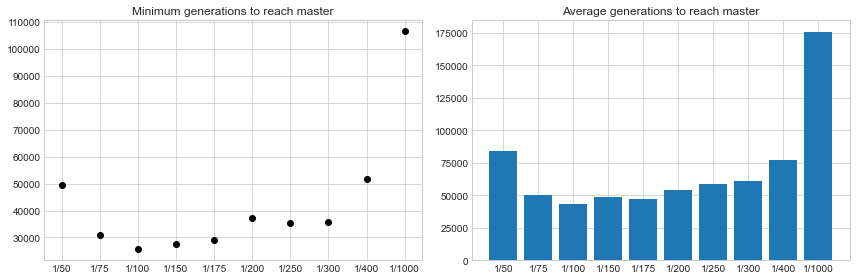

In [189]:
import pandas as pd
col = ['1/50', '1/75', '1/100', '1/150', '1/175', '1/200', '1/250', '1/300', '1/400','1/1000']
b = np.array(bins) # turn list into array so that it can be transposed for dataframe
df = pd.DataFrame(b.T, columns= col)
min_gen = df.min()
df_mean = df.mean()
fig, axes = plt.subplots(1,2,figsize = (12,4))
plt.subplots_adjust(wspace=.3, hspace=0.2)

axes[0].scatter(col,min_gen, color = 'k')
axes[0].set_title("Minimum generations to reach master")
axes[1].bar(col,df_mean)
axes[1].set_title("Average generations to reach master")

fig.tight_layout()
plt.show()

Histogram below is shown using area polygons due to the clustering of bins.  What is clear is that the mutation probability of 1/100 (green) has the most concentrated cluster of bins at the lower end of the generation count, which reflects in the overal mean for generations needed to reach parity with the master sequence (seen in table below histogram).

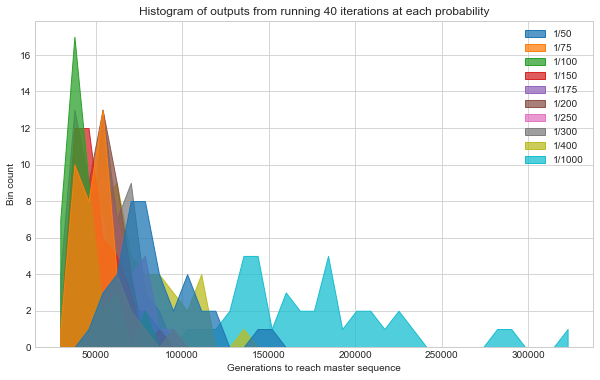

In [175]:
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.histplot(data = df, element = 'poly')
title = ax.set_title("Histogram of outputs from running 40 iterations at each probability")
x= ax.set_xlabel("Generations to reach master sequence")
y = ax.set_ylabel("Bin count")

Statisical output from dataset clearly shows that the mutation probability of 1/100 is the most effective.  The most telling stats are the min (minimum), mean (average), and standard deviation (std) - with the lower the number the more efficient that probability is at reaching parity with master sequence.  A low standard deviation signifies less variance in the data for that variable, i.e., more consistent results. 


In [192]:
df.describe() # statistics from results after running through each probability 40 times

,1/50,1/75,1/100,1/150,1/175,1/200,1/250,1/300,1/400,1/1000
count,40.00000,40.000000,40.000000,40.000000,40.000000,40.00000,40.00000,40.000000,40.000000,40.000000
mean,84374.25000,50574.475000,43017.500000,48970.900000,47014.525000,54353.97500,59007.07500,60914.400000,76934.500000,175760.700000
std,23109.97284,12313.821838,11593.726024,12770.083432,14143.109887,10116.31473,14628.06015,12325.637232,20899.136969,48891.123527
min,49539.00000,31090.000000,25560.000000,27498.000000,29187.000000,37280.00000,35478.00000,35646.000000,51900.000000,106578.000000
25%,69534.00000,41400.500000,35520.500000,39324.250000,36696.750000,46098.50000,49226.25000,51739.500000,60789.750000,140104.500000
50%,79384.00000,51407.000000,39875.000000,46398.000000,44599.000000,55294.00000,55110.00000,59444.500000,67563.000000,168216.500000
75%,98844.50000,55795.500000,47078.750000,57230.750000,52889.250000,59965.25000,66535.75000,70857.500000,88755.250000,198435.500000
max,151194.00000,92170.000000,78205.000000,87670.000000,83584.000000,83779.00000,94786.00000,90331.000000,133546.000000,326750.000000


### Ideas for improving evolutionary algorithm:
1. Assign weights to letters that are more commonly used.  When probability is triggered to assing a random letter from the alphabet, the random choice is slightly skewed with a weighted alphabet.
2. Create a mutation rate that can be altered the closer the sequence becomes to the master (start out with a higher probability for mutation, then decrease distance decreases).
    - For example, a starting mutation probability of 1/10 may be the most effective, but as the distance between the strings reduces to 20 or 30 edits from partity a more suitable probability of 1/50 or 1/100 can be introduced.
3. Incorporate into algorithm a function that introduces different probabilities, assesses efficiency of achieving the master sequnce at that probability, and then giving a synoposis of the most efficient probabilities. 

### Examples of optimisation problems in the workplace:

1. One example of how algorithms of this sort can be used in my workplace is though address matching.
    - A common problem that persists for local government is when the same address is entered in slightly different formats.  Using algorithms such as the Levenstein Ratio and FuzzyWuzzy can help us match up addresses that have slight differences.
    - First, the Levenstein Distance Ratio can be utilised to assess similarity ratio's between the text in addresses.  Thus, if two addresses are similar, but not an exact match, a threshold can be set whereby anything over that threshold might be sent to the next stage.  
    - An address that meets the similarity threshold can then be run through a Hamming Distance algorithm to match them up
    - If you know that one address is definately correct (or you want to use that style), you can set it as the master and use evolutionary optimisation to match up the part of the text field in the address that is incorrect (or in different style).
    - Style differences: Flat 1, 76 Melrose Place vs 1/76 Melrose Place vs Flat One 76 Melrose Place
    - This can be done manually for small datasets, but each local authority in the UK manages the Local Property Gazetteer (LLPG), which is often over 100,000 property records.  Thus, using evolutionary optimisation can be a very useful tool in automating the address matching process.
    

  
    

# Conclusion


This investigation has looked at both the Levenshtein Distance Ratio and Hamming Distance as tools to calculate the distance, or difference, between two strings.  Completely random sequence were generated of the same length to a master sequence, and, through random mutations and distance calculations to determine beneficial mutations over harmful mutations, an attempt was made to evolve the random sequence so that parity was achieved with the master sequence.  <p>The Levenshtein Distance Ratio had many beneficial mutations in the first few thousand offspring, but slowed to a standstill and failed to achieve parity with the master sequence, even after introducing a shorter sequence to speed up compuation time.  The best similarity ratio achieved was 81.6% <p>The Hamming Distance algorithm was much more efficient and achieved parity with the master sequence after 25,000 offspring.  Multiple experiment runs were conducted to assess the best probability parameter for mutation, with a conclusion that a mutation probability of between 0.02 and 0.004 will likely achieve the best results. 
<p> - The overall winner for most efficient mutation probability was 1/100, or 0.01 
<p>    - Achieved parity with master sequence in 25,560 offspring
<p>    - Had the lowest mean generation count and only a slightly higher standard deviation than 1/200 after 40 iterations.
<p>Thus, for an evolutionary optimisation task using strings of equal length, the Hamming Distance is a more efficient metric than the Levenshtein Distance.  Becuase the Hamming Distance requires strings to be of equal length while the Levenshtein distance does not, there are many cases where the Hamming Distance will not work and a distance metric like Levenshtein may be more suitable.

## References
1. https://stackabuse.com/levenshtein-distance-and-text-similarity-in-python/ <p>
2. https://www.datacamp.com/community/tutorials/fuzzy-string-python <p>